In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns

In [3]:
games_data=pd.read_csv('games.csv')
tracking_20=pd.read_csv('tracking2020.csv')
players_data=pd.read_csv('players.csv')
plays_data=pd.read_csv('plays.csv')
scout_data=pd.read_csv('PFFScoutingData.csv')


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           764 non-null    int64 
 1   season           764 non-null    int64 
 2   week             764 non-null    int64 
 3   gameDate         764 non-null    object
 4   gameTimeEastern  764 non-null    object
 5   homeTeamAbbr     764 non-null    object
 6   visitorTeamAbbr  764 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.9+ KB


In [5]:
tracking_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11821701 entries, 0 to 11821700
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   x              float64
 2   y              float64
 3   s              float64
 4   a              float64
 5   dis            float64
 6   o              float64
 7   dir            float64
 8   event          object 
 9   nflId          float64
 10  displayName    object 
 11  jerseyNumber   float64
 12  position       object 
 13  team           object 
 14  frameId        int64  
 15  gameId         int64  
 16  playId         int64  
 17  playDirection  object 
dtypes: float64(9), int64(3), object(6)
memory usage: 1.6+ GB


In [6]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


In [7]:
plays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

In [8]:
scout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   19979 non-null  int64  
 1   playId                   19979 non-null  int64  
 2   snapDetail               5919 non-null   object 
 3   snapTime                 5918 non-null   float64
 4   operationTime            5918 non-null   float64
 5   hangTime                 13098 non-null  float64
 6   kickType                 13723 non-null  object 
 7   kickDirectionIntended    13701 non-null  object 
 8   kickDirectionActual      13701 non-null  object 
 9   returnDirectionIntended  4754 non-null   object 
 10  returnDirectionActual    4756 non-null   object 
 11  missedTackler            1348 non-null   object 
 12  assistTackler            1034 non-null   object 
 13  tackler                  4759 non-null   object 
 14  kickoffReturnFormation

In [9]:
scout_data.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [10]:
#Lets filter the plays DF to only look at punts

punts_data=plays_data[plays_data['specialTeamsPlayType']=='Punt']

#Now lets filter by plays which resulted in returns

punts_data=punts_data[punts_data['specialTeamsResult']=='Return']

#filter plays that had a penalty

punts_data=punts_data[punts_data['penaltyCodes'].isnull()]

punts_data.shape

(1881, 25)

In [11]:
features=punts_data.copy()

In [12]:
features=features.drop(['specialTeamsPlayType','playDescription','specialTeamsResult','kickBlockerId','penaltyCodes','penaltyJerseyNumbers','penaltyYards','passResult','playResult','yardlineSide','down'],axis=1)

In [13]:
features.head()

,gameId,playId,quarter,yardsToGo,possessionTeam,kickerId,returnerId,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,absoluteYardlineNumber
14,2018090600,2599,3,16,ATL,37267.0,29957,26,10:22:00,3,6,46.0,9.0,36
27,2018090900,485,1,14,BUF,46903.0,46532,28,07:25:00,7,0,46.0,-1.0,82
28,2018090900,575,1,9,BAL,31018.0,37228,26,06:37:00,7,0,63.0,4.0,36
29,2018090900,674,1,7,BUF,46903.0,46532,18,05:43:00,7,0,51.0,3.0,92
32,2018090900,1136,2,13,BUF,46903.0,46532,22,14:21:00,14,0,49.0,51.0,32


In [14]:
#Now lets merge this with the scouting data
features2=pd.merge(features,scout_data,on='playId')



In [15]:
#Lets clean the columns and keep only the neccesary ones

features2=features2.drop(['missedTackler','assistTackler','tackler','kickoffReturnFormation','gunners','puntRushers','specialTeamsSafeties','vises','kickContactType','gameId_x','gameId_y'],axis=1)

In [16]:
features2.returnerId.nunique()

158

In [17]:
features2.columns


Index(['playId', 'quarter', 'yardsToGo', 'possessionTeam', 'kickerId',
       'returnerId', 'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'kickLength', 'kickReturnYardage',
       'absoluteYardlineNumber', 'snapDetail', 'snapTime', 'operationTime',
       'hangTime', 'kickType', 'kickDirectionIntended', 'kickDirectionActual',
       'returnDirectionIntended', 'returnDirectionActual'],
      dtype='object')

In [18]:
# only looking at data from plays when the home team is on the offense
right = tracking_20[tracking_20['playDirection'] == 'right']
# only looking at a specific match
match = right[right['gameId'] == 2020091312]

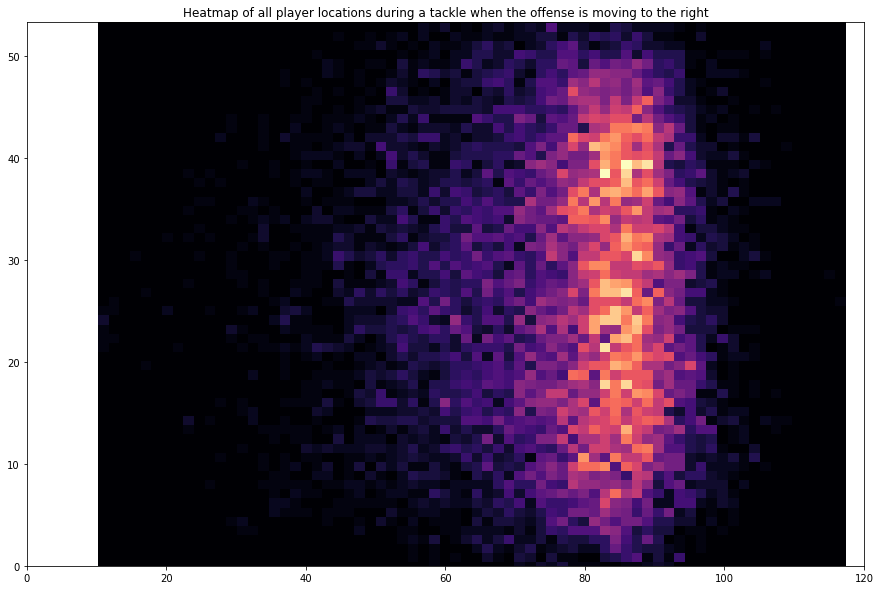

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist2d(right['x'][right['event'] == 'tackle'], right['y'][right['event'] == 'tackle'],bins=70, cmap='magma')
plt.xlim(0 , 120)
plt.ylim(0,  53.3)
plt.title('Heatmap of all player locations during a tackle when the offense is moving to the right')
plt.show()

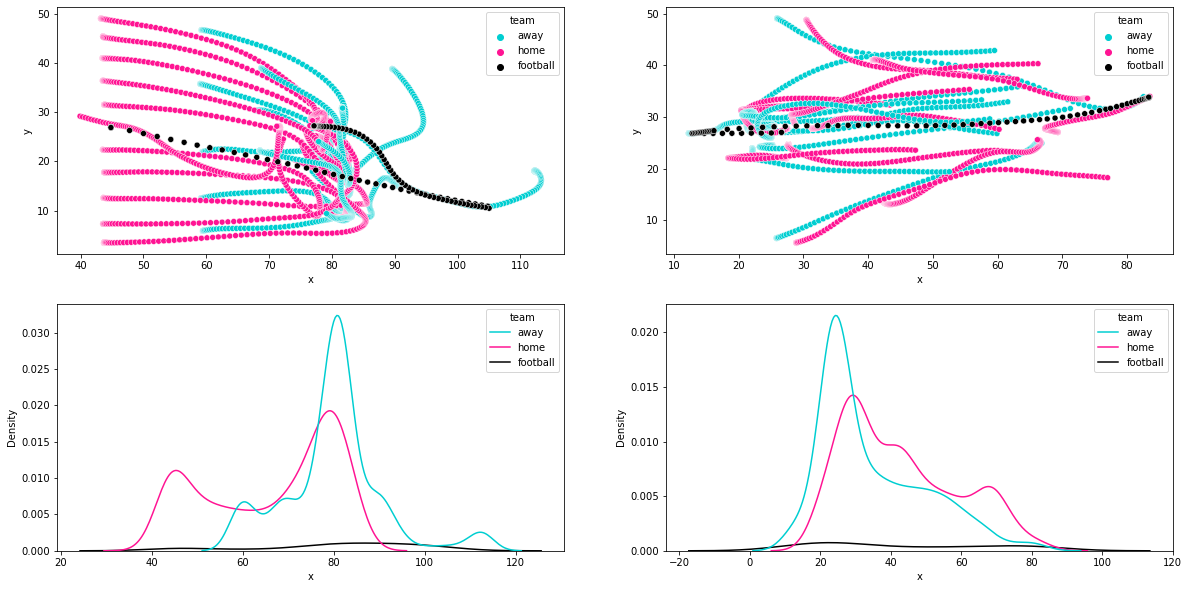

In [20]:
pal = ['darkturquoise', 'deeppink', 'black']
fig, axs = plt.subplots(2, 2, figsize=(20,10))
sns.scatterplot(ax=axs[0,0], data=match[match['playId'] == 2382], x='x', y='y', hue='team', palette=pal)
sns.scatterplot(ax=axs[0,1], data=match[match['playId'] ==  3986], x='x', y='y', hue='team', palette=pal)
sns.kdeplot(ax=axs[1,0], data=match[match['playId'] == 2382], x='x', hue='team', palette=pal)
sns.kdeplot(ax=axs[1,1], data=match[match['playId'] ==  3986], x='x',hue='team', palette=pal)
plt.show()


In [21]:
match[match['playId'] == 2382]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
11718845,2020-09-14T01:59:48.400,59.29,21.90,0.28,0.30,0.03,231.82,76.05,None,42094.0,C.J. Goodwin,29.0,CB,away,1,2020091312,2382,right
11718846,2020-09-14T01:59:48.500,59.33,21.90,0.35,0.37,0.04,231.19,86.98,None,42094.0,C.J. Goodwin,29.0,CB,away,2,2020091312,2382,right
11718847,2020-09-14T01:59:48.600,59.37,21.89,0.40,0.41,0.04,226.43,98.55,None,42094.0,C.J. Goodwin,29.0,CB,away,3,2020091312,2382,right
11718848,2020-09-14T01:59:48.700,59.41,21.88,0.43,0.35,0.04,225.53,101.50,None,42094.0,C.J. Goodwin,29.0,CB,away,4,2020091312,2382,right
11718849,2020-09-14T01:59:48.800,59.42,21.88,0.26,0.33,0.01,225.53,110.34,None,42094.0,C.J. Goodwin,29.0,CB,away,5,2020091312,2382,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11721347,2020-09-14T01:59:58.800,77.12,27.15,0.40,2.57,0.05,NaN,NaN,None,NaN,football,NaN,NaN,football,105,2020091312,2382,right
11721348,2020-09-14T01:59:58.900,77.10,27.16,0.13,2.22,0.02,NaN,NaN,None,NaN,football,NaN,NaN,football,106,2020091312,2382,right
11721349,2020-09-14T01:59:59.000,77.11,27.14,0.14,1.92,0.03,NaN,NaN,None,NaN,football,NaN,NaN,football,107,2020091312,2382,right
11721350,2020-09-14T01:59:59.100,77.12,27.20,0.32,1.61,0.06,NaN,NaN,None,NaN,football,NaN,NaN,football,108,2020091312,2382,right


In [22]:
plays_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

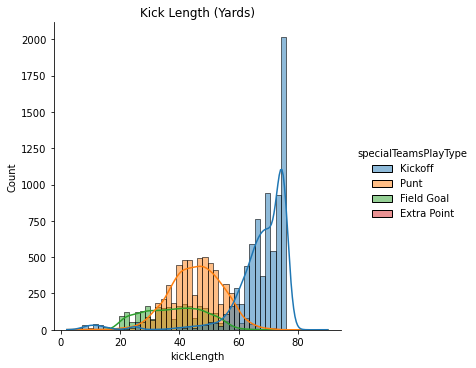

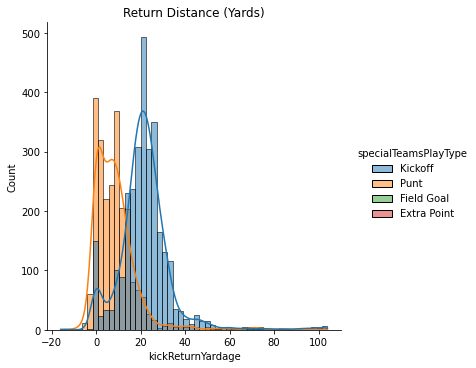

In [23]:
sns.displot(data=plays_data, x="kickLength", hue='specialTeamsPlayType',bins=50, kde=True).set(title='Kick Length (Yards)')
sns.displot(data=plays_data, x="kickReturnYardage",hue='specialTeamsPlayType', bins=50, kde=True).set(title='Return Distance (Yards)')


In [24]:
plays_data['specialTeamsResult'].value_counts()

Kick Attempt Good           5470
Return                      5207
Touchback                   5156
Fair Catch                  1645
Downed                       834
Out of Bounds                651
Kick Attempt No Good         585
Muffed                       214
Non-Special Teams Result     101
Blocked Kick Attempt          61
Blocked Punt                  39
Kickoff Team Recovery         16
Name: specialTeamsResult, dtype: int64

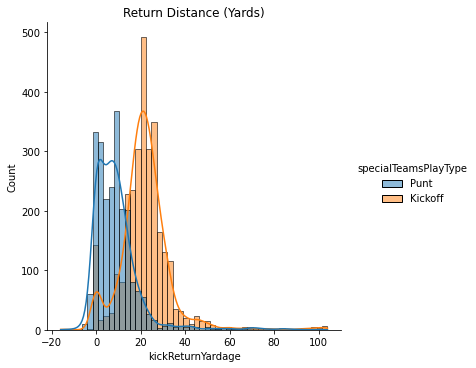

In [25]:
sns.displot(data=plays_data[plays_data['specialTeamsResult']=='Return'], x="kickReturnYardage",hue='specialTeamsPlayType', bins=50, kde=True).set(title='Return Distance (Yards)')

In [26]:
return_data=plays_data[plays_data['specialTeamsResult']=='Return']


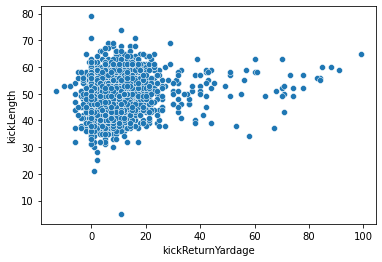

In [27]:
sns.scatterplot(data=return_data[return_data['specialTeamsPlayType']=='Punt'],x="kickReturnYardage",y="kickLength")

In [28]:
return_data[return_data['specialTeamsPlayType']=='Kickoff'].loc[:,['kickLength','kickReturnYardage']].corr()

,kickLength,kickReturnYardage
kickLength,1.000000,0.514763
kickReturnYardage,0.514763,1.000000


In [29]:
return_data[return_data['specialTeamsPlayType']=='Punt'].loc[:,['kickLength','kickReturnYardage']].corr()

,kickLength,kickReturnYardage
kickLength,1.000000,0.183598
kickReturnYardage,0.183598,1.000000


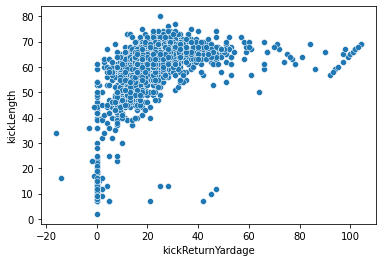

In [30]:
sns.scatterplot(data=return_data[return_data['specialTeamsPlayType']=='Kickoff'],x="kickReturnYardage",y="kickLength")

In [31]:
fair_catch=plays_data[plays_data['specialTeamsResult']=='Fair Catch']

In [32]:
plays_data.loc[1753,:]

gameId                                                           2018100701
playId                                                                 4281
playDescription           G.Gano kicks 74 yards from CAR 35 to NYG -9. O...
quarter                                                                   4
down                                                                      0
yardsToGo                                                                 0
possessionTeam                                                          CAR
specialTeamsPlayType                                                Kickoff
specialTeamsResult                                                   Return
kickerId                                                            35102.0
returnerId                                                41238;43880;43329
kickBlockerId                                                           NaN
yardlineSide                                                            CAR
yardlineNumb

In [33]:
return_punts=return_data[return_data['specialTeamsPlayType']=='Punt']

In [34]:
##sns.displot(scout_data['hangTime'],kde=True,hue='')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [35]:
plays_data['specialTeamsPlayType'].value_counts()

Kickoff        7843
Punt           5991
Extra Point    3488
Field Goal     2657
Name: specialTeamsPlayType, dtype: int64

In [36]:
punts_ids=plays_data[plays_data['specialTeamsPlayType']=='Punt']['playId']

In [37]:
punts_ids=punts_ids.reset_index()
punts_ids=punts_ids.drop('index',axis=1)

punts_ids

,playId
0,366
1,872
2,973
3,1850
4,1989
...,...
5986,1359
5987,1479
5988,2235
5989,2497


In [38]:
punts_ids.columns

Index(['playId'], dtype='object')

In [42]:
scout_punts=pd.merge(punts_ids,scout_data,on='playId')

scout_punts.snapTime.isnull().sum()

18438

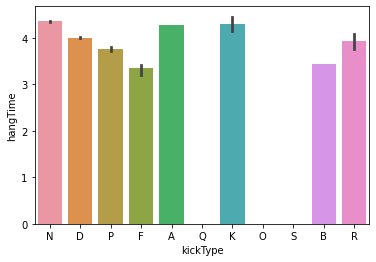

In [43]:
sns.barplot(data=scout_punts,x='kickType',y='hangTime')

In [46]:
scout_data.kickType.value_counts()

D    6944
N    4095
A    1781
F     319
P     226
O     155
Q     134
K      50
S      14
R       4
B       1
Name: kickType, dtype: int64

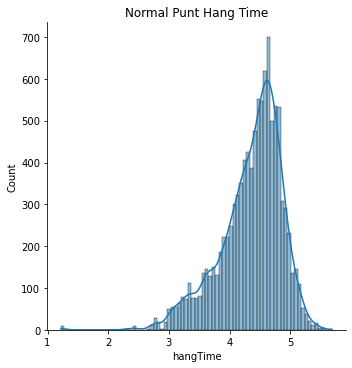

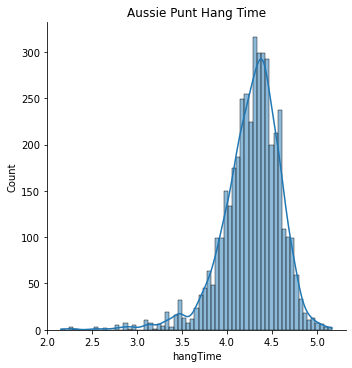

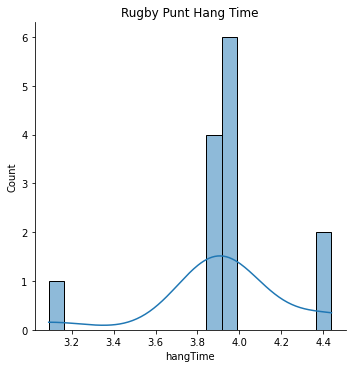

In [44]:
sns.displot(scout_punts[scout_punts['kickType']=='N']['hangTime'],kde=True).set(title='Normal Punt Hang Time')
sns.displot(scout_punts[scout_punts['kickType']=='A']['hangTime'],kde=True).set(title='Aussie Punt Hang Time')
sns.displot(scout_punts[scout_punts['kickType']=='R']['hangTime'],kde=True).set(title='Rugby Punt Hang Time')

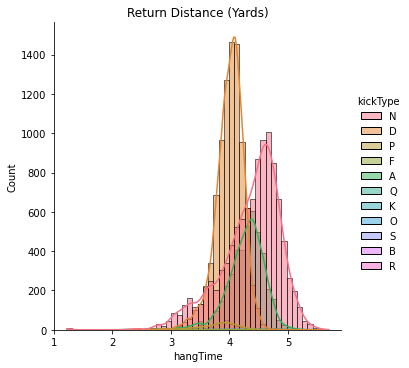

In [47]:
sns.displot(data=scout_punts, x="hangTime",hue='kickType', bins=50, kde=True).set(title='Return Distance (Yards)')